<a href="https://colab.research.google.com/github/daudiii/CIFAR-AlexNet/blob/master/CIFAR_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
print(torch.cuda.is_available())

True


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

 99%|█████████▊| 168108032/170498071 [00:11<00:00, 33698838.36it/s]

Files already downloaded and verified


torch.Size([3, 36, 138])


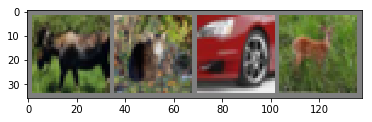

 deer   cat   car  deer


In [4]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    print(img.shape)
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap="gray")
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 9, 5, padding=2)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(3, stride=1)
        self.conv2 = nn.Conv2d(9, 13, 4)
        self.conv3 = nn.Conv2d(13, 17, 3)
        self.conv4 = nn.Conv2d(17, 19, 4)
        self.conv5 = nn.Conv2d(19, 12, 4)
        self.fc1 = nn.Linear(12*15*15, 150)
        self.fc2 = nn.Linear(150, 150)
        self.fc3 = nn.Linear(150, 10)
        self.dropout = nn.Dropout(p=0.2)
        self.norm = nn.LocalResponseNorm(3, alpha=0.0001, beta=0.75, k=2.0)
        self.smax = nn.Softmax()

    def forward(self, x):
        x = self.pool(self.relu(self.norm(self.conv1(x))))
        x = self.pool(self.relu(self.norm(self.conv2(x))))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.pool(self.relu(self.conv5(x)))
        x = x.view(-1, 12*15*15)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = AlexNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)
model.to(device)

cuda:0


AlexNet(
  (conv1): Conv2d(3, 9, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu): ReLU()
  (pool): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(9, 13, kernel_size=(4, 4), stride=(1, 1))
  (conv3): Conv2d(13, 17, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(17, 19, kernel_size=(4, 4), stride=(1, 1))
  (conv5): Conv2d(19, 12, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=2700, out_features=150, bias=True)
  (fc2): Linear(in_features=150, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
  (norm): LocalResponseNorm(3, alpha=0.0001, beta=0.75, k=2.0)
  (smax): Softmax()
)

In [0]:
#model.conv1.weight.data.fill_(1)
#model.conv2.weight.data.fill_(0.6)
#model.conv3.weight.data.fill_(0.3)
#model.conv4.weight.data.fill_(0.7)
#model.conv5.weight.data.fill_(1)

In [53]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.0001)
print(trainset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train


In [61]:

for epoch in range(10):
  running_loss = 0.0
  i=0;
  for data in trainloader:
    x,y=data[0].to(device), data[1].to(device)
    output=model(x)
    loss=criterion(output,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i % 90 == 89:    # print every 90 mini-batches (390 total minis)
      print('[%d, %5d] loss: %.3f' %
      (epoch + 1, i + 1, running_loss/90))
      running_loss = 0.0
            
    i=i+1
print('Finished Training')



[1,    90] loss: 0.191
[1,   180] loss: 0.193
[1,   270] loss: 0.197
[1,   360] loss: 0.204
[2,    90] loss: 0.180
[2,   180] loss: 0.190
[2,   270] loss: 0.199
[2,   360] loss: 0.201
[3,    90] loss: 0.178
[3,   180] loss: 0.186
[3,   270] loss: 0.188
[3,   360] loss: 0.202
[4,    90] loss: 0.173
[4,   180] loss: 0.186
[4,   270] loss: 0.181
[4,   360] loss: 0.193
[5,    90] loss: 0.170
[5,   180] loss: 0.179
[5,   270] loss: 0.178
[5,   360] loss: 0.182
[6,    90] loss: 0.170
[6,   180] loss: 0.173
[6,   270] loss: 0.177
[6,   360] loss: 0.174
[7,    90] loss: 0.151
[7,   180] loss: 0.167
[7,   270] loss: 0.180
[7,   360] loss: 0.173
[8,    90] loss: 0.157
[8,   180] loss: 0.166
[8,   270] loss: 0.167
[8,   360] loss: 0.171
[9,    90] loss: 0.149
[9,   180] loss: 0.162
[9,   270] loss: 0.174
[9,   360] loss: 0.166
[10,    90] loss: 0.155
[10,   180] loss: 0.152
[10,   270] loss: 0.158
[10,   360] loss: 0.161
Finished Training


**Testing...**



torch.Size([3, 546, 274])


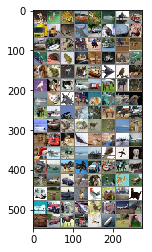

GroundTruth:   bird  deer  frog  ship


In [0]:
dataiter = iter(trainloader)
data = dataiter.next()
images, labels = data[0].to(device), data[1].to(device)

# print images
imshow(torchvision.utils.make_grid(images.cpu()))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
print(images.shape)
outputs = model(images)
print(outputs)

torch.Size([128, 3, 32, 32])
tensor([[-0.9557, -1.9163, -0.3927,  ...,  2.5735, -2.9666, -1.4030],
        [-2.2450, -3.1960,  2.1668,  ...,  1.5149, -5.1408, -4.6747],
        [-2.5930, -0.7117,  1.0754,  ..., -2.9920, -4.2467, -2.3648],
        ...,
        [ 0.9366,  0.6054, -0.0297,  ..., -1.9662,  2.0520, -0.2712],
        [-1.6651, -4.8665,  3.3489,  ..., -0.0277, -5.5516, -6.9378],
        [-0.7671, -0.9885,  1.2401,  ...,  1.4248, -2.5686, -0.6750]],
       device='cuda:0', grad_fn=<AddmmBackward>)


In [0]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  horse  deer  frog truck


In [64]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 95 %


In [65]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 70 %
Accuracy of   car : 73 %
Accuracy of  bird : 56 %
Accuracy of   cat : 38 %
Accuracy of  deer : 46 %
Accuracy of   dog : 57 %
Accuracy of  frog : 68 %
Accuracy of horse : 60 %
Accuracy of  ship : 76 %
Accuracy of truck : 71 %


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
